In [2]:
import json
from tqdm.notebook import tqdm

# Maybe add military
protest_key_words = set([
    'protest', 'protesters', 'protester',
    'demonstration', 'demonstrations', 'demonstrators', 'demonstrator'
    'clash', 'clashes',
    'riot', 'riots',
    'barricades', 'barricade',
    'tear', 'gas',
    'unrest', 'unrests',
    'revolt',
    'upheaval',
    'uproar',
    'manifestation', 'manifestations'
])
# Removed long (HK), yellow(France), avenue (France)
protest_specific_key_words = {
'Venezuela':['maduro', 'guaido', 'venezuela', 'caracas', 'venezuelan', 'juan', 'venezuelans', 'nicolas', 'lopez', 'chavez', 'cabello', 'leopoldo', 'diosdado', 'hyperinflation', 'latin', 'shortages', 'cucuta', 'hugo', 'padrino'],
'France':['paris', 'macron', 'french', 'france', 'champs', 'elysees', 'vest', 'vests', 'arc', 'triomphe', 'emmanuel', 'christophe', 'castaner', 'jackets', 'philippe', 'elysee', 'marseille', 'michel', 'edouard', 'lyon'],
'Hong Kong':['hong', 'kong', 'china', 'lam', 'chinese', 'extradition', 'beijing', 'mainland', 'carrie', 'wong', 'yuen', 'cheung', 'chan', 'communist', 'xi', 'kowloon', 'xinjiang', 'kongers', 'chinese'],
'Iran':['iran', 'iranian', 'tehran', 'soleimani', 'khamenei', 'irgc', 'ali', 'ayatollah', 'fadavi', 'drone', 'iranians', 'irbil', 'erbil', 'rouhani', 'mousavi', 'khuzestan', 'persian', 'zarif']
}

with open('unfiltered_articles.json') as articles_fh:
    unfiltered_articles = json.load(articles_fh)

In [3]:
import unidecode
import re
from nltk.stem.snowball import PorterStemmer
#import spacy
#nlp = spacy.load("en_core_web_sm")
#doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

def preprocess_text(text, split=True, stem=True):
    text = text.lower()
    # Convert to ascii
    text = unidecode.unidecode(text)
    if split:
        text = re.split('!?\.?,?;?;?\s+', text) #text.split() #[token for token in nlp(text)]
    if stem:
        stemmer = PorterStemmer()
        text = [stemmer.stem(tok) for tok in text]
    return text



In [4]:
raw_articles = [article['body'] for article in tqdm(unfiltered_articles)]
raw_articles[0]

'Demonstrators are moving between districts, blocking roads and setting fires.\n\nHere\'s what you need to know:Tear gas engulfed districts as protesters besieged police stations.City\'s leader warns protesters against challenging Beijing.Protesters occupy a shopping mall where clashes erupted last month.Demonstrators rally across the city.Police say hundreds have been arrested this summer.Tear gas engulfed districts as protesters besieged police stations.\n\nRiot police officers fired many volleys of tear gas at protesters near government offices, apartment complexes, shopping malls and parks across Hong Kong on Monday, as clashes with demonstrators plunged a broad stretch of the territory into chaos.\n\nAntigovernment demonstrators fanned out across at least a half-dozen districts, occupying roads and hurling objects at police stations as they tested the limits of the police force. They set a fire outside a police station in Sha Tin, in the New Territories region of northern Hong Kon

In [5]:
processed_articles = [preprocess_text(article['body'], stem=False) for article in tqdm(unfiltered_articles)]
processed_articles[0]

['demonstrators',
 'are',
 'moving',
 'between',
 'districts',
 'blocking',
 'roads',
 'and',
 'setting',
 'fires',
 "here's",
 'what',
 'you',
 'need',
 'to',
 'know:tear',
 'gas',
 'engulfed',
 'districts',
 'as',
 'protesters',
 'besieged',
 'police',
 "stations.city's",
 'leader',
 'warns',
 'protesters',
 'against',
 'challenging',
 'beijing.protesters',
 'occupy',
 'a',
 'shopping',
 'mall',
 'where',
 'clashes',
 'erupted',
 'last',
 'month.demonstrators',
 'rally',
 'across',
 'the',
 'city.police',
 'say',
 'hundreds',
 'have',
 'been',
 'arrested',
 'this',
 'summer.tear',
 'gas',
 'engulfed',
 'districts',
 'as',
 'protesters',
 'besieged',
 'police',
 'stations',
 'riot',
 'police',
 'officers',
 'fired',
 'many',
 'volleys',
 'of',
 'tear',
 'gas',
 'at',
 'protesters',
 'near',
 'government',
 'offices',
 'apartment',
 'complexes',
 'shopping',
 'malls',
 'and',
 'parks',
 'across',
 'hong',
 'kong',
 'on',
 'monday',
 'as',
 'clashes',
 'with',
 'demonstrators',
 'plunge

In [6]:
from collections import defaultdict

def keywordCounter(tokenized_article, labeled_kws, protest_kw):
    keyword_counts = defaultdict(lambda: 0)
    label_counts = defaultdict(lambda: 0)
    protest_counts = 0
    for tok in tokenized_article:
        for label, key_words in labeled_kws.items():
            if tok in key_words:
                label_counts[label] += 1
                keyword_counts[tok] +=1
        if tok in protest_kw:
            protest_counts += 1
    return keyword_counts, label_counts, protest_counts

kw_counts = [keywordCounter(article, protest_specific_key_words, protest_key_words) for article in tqdm(processed_articles)]
kw_counts[0]

(defaultdict(<function __main__.keywordCounter.<locals>.<lambda>()>,
             {'hong': 49,
              'kong': 41,
              'mainland': 6,
              'extradition': 3,
              'chinese': 8,
              'beijing': 8,
              'yuen': 2,
              'carrie': 1,
              'lam': 11,
              'china': 3,
              'chan': 5,
              'cheung': 2,
              'wong': 3,
              'communist': 1}),
 defaultdict(<function __main__.keywordCounter.<locals>.<lambda>()>,
             {'Hong Kong': 143}),
 96)

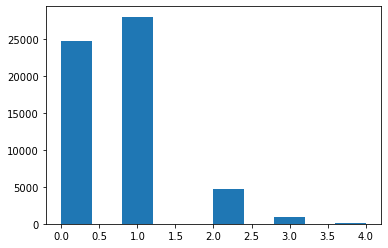

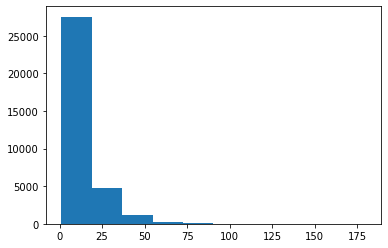

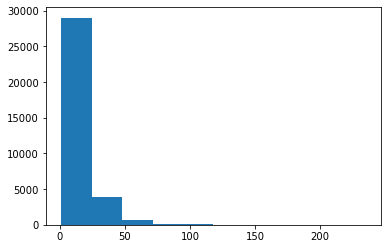

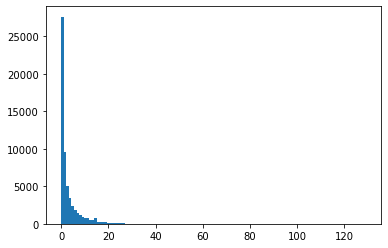

In [7]:
import matplotlib.pyplot as plt

num_protests_per_article = [len(label_count) for kw_count, label_count, _ in kw_counts]
min_kw_per_article = [min([val for _,val in label_count.items()]) for _, label_count, _ in kw_counts if label_count]
max_kw_per_article = [max([val for _,val in label_count.items()]) for _, label_count, _ in kw_counts if label_count]
protest_kws_counts = [protest_count for _, _, protest_count in kw_counts]
#min_kw_per_article = [min([val for _,val in label_count]) for _, label_count in kw_counts]

plt.hist(num_protests_per_article)
plt.show()

plt.hist(min_kw_per_article)
plt.show()

plt.hist(max_kw_per_article)
plt.show()

plt.hist(protest_kws_counts, bins=120)
plt.show()

In [8]:
def minKeywordFilter(kw_counts , label_threshold, protest_threshold):
    _, label_counts, protest_kw_count =kw_counts 
    if label_counts:
        return min([val for _,val in label_counts.items()]) >= label_threshold and protest_kw_count >= protest_threshold
    else:
        return False

LABEL_THRESHOLD = 2
PROTEST_THRESHOLD = 8
article_tuples = list(zip(unfiltered_articles, processed_articles, kw_counts))
kw_filtered_articles = [article_tuple for article_tuple in article_tuples if minKeywordFilter(article_tuple[2], LABEL_THRESHOLD, PROTEST_THRESHOLD)]
removed_articles = [article_tuple for article_tuple in article_tuples if not minKeywordFilter(article_tuple[2], LABEL_THRESHOLD, PROTEST_THRESHOLD)]
raw_filtered_texts = [article[0]['body'] for article in kw_filtered_articles]
raw_filtered_kw = [article[2] for article in kw_filtered_articles]

In [9]:
len(kw_filtered_articles)


4499

In [10]:
from random import sample

sampled_articles = sample(kw_filtered_articles, k=20)
sampled_articles = [" ".join(sampled_article[1]) for sampled_article in sampled_articles]
sampled_articles[0]

'foreign direct investment (fdi) into china in july rose 4.1 per cent from a year ago to us$8.07 billion according to china\'s ministry of commerce us president donald trump claims companies are fleeing china because of tariffs imposed by his administration over the last 16 months of the trade war blackrock the world\'s biggest asset manager has rescheduled its asia media forum set for next month in hong kong as protesters disrupted operations at the city\'s airport for a second consecutive day on tuesday the invitation-only forum in which journalists meet global and regional executives from the company was set to take place during the first week of september it has now been rescheduled to february 2020 blackrock said "the power of this convening lies in the diverse range of perspectives brought together from throughout the region and we are adjusting the schedule so that as many partners as possible from across asia are able to join," the company said without citing the protests black

In [190]:
samp_article = sample(sampled_articles,k=1)
samp_article

['city\'s chief executive due to hold first \'public dialogue\' on thursday as she acknowledges trust deficit hong kong leader carrie lam said on tuesday the city\'s police force which has been accused of beating activists and using excessive force in three months of street protests is under extreme pressure and acknowledged it will be a "long road" towards healing the divisions in hong kong society beijing-backed lam said it was "quite remarkable" there had not been fatalities during the demonstrations and said she hoped dialogue would help resolve the political crisis gripping the city police cast doubt over allegations that officers beat a man during a protest on saturday while amnesty international called on the government to investigate police use of force on demonstrators police acting senior superintendent vasco williams told reporters on monday that footage of the alleged incident appeared to show an "officer kicking a yellow object" not a man in an alley he conceded that the i

In [191]:
keywordCounter(preprocess_text(samp_article[0],split=True),protest_specific_key_words, protest_key_words)

(defaultdict(<function __main__.keywordCounter.<locals>.<lambda>()>,
             {'hong': 9,
              'kong': 8,
              'lam': 7,
              'xi': 1,
              'mainland': 4,
              'china': 5,
              'communist': 1}),
 defaultdict(<function __main__.keywordCounter.<locals>.<lambda>()>,
             {'Hong Kong': 35}),
 9)

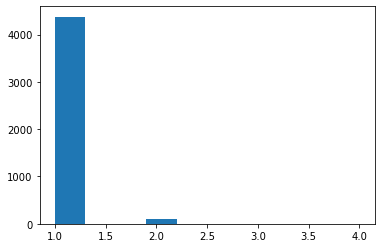

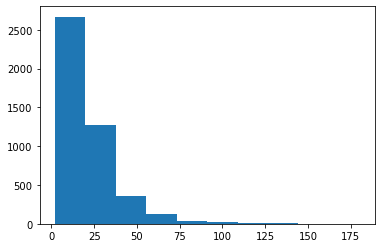

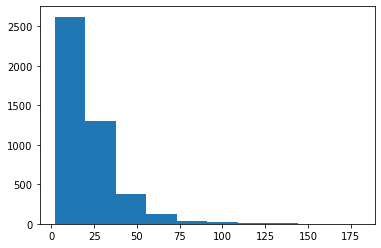

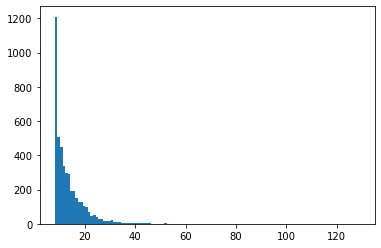

In [11]:
import matplotlib.pyplot as plt

filtered_kw_counts = [kw_count for _,_,kw_count in kw_filtered_articles]
num_protests_per_article = [len(label_count) for kw_count, label_count, _ in filtered_kw_counts]
min_kw_per_article = [min([val for _,val in label_count.items()]) for _, label_count, _ in filtered_kw_counts if label_count]
max_kw_per_article = [max([val for _,val in label_count.items()]) for _, label_count, _ in filtered_kw_counts if label_count]
protest_kws_counts = [protest_count for _, _, protest_count in filtered_kw_counts]
#min_kw_per_article = [min([val for _,val in label_count]) for _, label_count in kw_counts]

plt.hist(num_protests_per_article)
plt.show()

plt.hist(min_kw_per_article)
plt.show()

plt.hist(max_kw_per_article)
plt.show()

plt.hist(protest_kws_counts, bins=120)
plt.show()

In [13]:
#corpus_tf_idfs = vectorizer.transform()


def assign_label(tupl):
    _, _, (kw, labels, _) = tupl
    if len(labels) > 1:
        return "NA"
    else:
        return [key for key in labels][0]

def score_seed(tupl):
    score = 0
    _, _, (kw, labels, _) = tupl 
    if len(labels) == 1:
        keys = [key for key in labels]
        score = labels[keys[0]]
    return score

PROTESTS = ['Venezuela', 'France', 'Hong Kong', 'Iran']

def gather_k_seeds(ranked_labelled_tuples, k =200):
    seeds = defaultdict(list)
    ranks = defaultdict(list)
    for rank, label, tupl in ranked_labelled_tuples:
        if len(seeds[label]) < k:
            seeds[label].append(tupl)
            ranks[label].append(rank)
    return seeds, ranks

SEED_SIZE = 150
scored_examples = [(score_seed(tupl), tupl) for tupl in kw_filtered_articles]
ranked_examples = sorted(scored_examples , key = lambda x: x[0], reverse=True)
ranks, ranked_examples = zip(*ranked_examples)
labels = [assign_label(tupl) for tupl in ranked_examples]
labelled_ranks = list(zip(labels,ranks))
ranked_labelled_tuples = list(zip(ranks,labels,ranked_examples))
seeds, seed_ranks = gather_k_seeds(ranked_labelled_tuples, k = SEED_SIZE)

# Take the most likely from each class (With no overlap between kw labels. Visualize the stats from above again)
# Come up with a min threshold that gives you the highest number K of these clean articles
# Add a NOTA class
# Train a classifier
# Evaluate over a holdout set
# Score all the examples
# Filter based on scores
# Threshold
# Check class distribution across riots
# Manually evaluate 30 samples

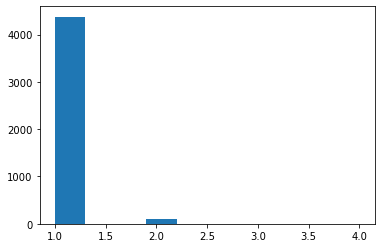

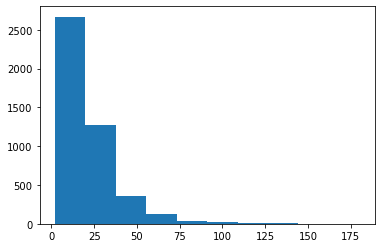

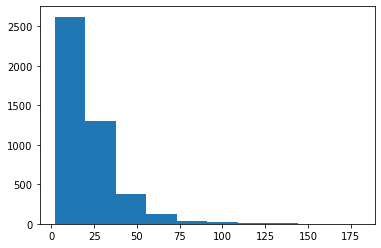

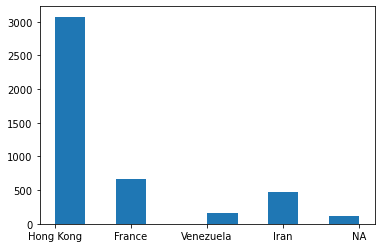

In [14]:
import matplotlib.pyplot as plt

num_protests_per_article = [len(label_count) for kw_count, label_count,_ in raw_filtered_kw]
min_kw_per_article = [min([val for _,val in label_count.items()]) for _, label_count,_ in raw_filtered_kw if label_count]
max_kw_per_article = [max([val for _,val in label_count.items()]) for _, label_count,_ in raw_filtered_kw if label_count]
#min_kw_per_article = [min([val for _,val in label_count]) for _, label_count in kw_counts]

plt.hist(num_protests_per_article)
plt.show()

plt.hist(min_kw_per_article)
plt.show()

plt.hist(max_kw_per_article)
plt.show()

plt.hist(labels)
plt.show()

In [15]:
[len(seed) for protest, seed in seeds.items()]

[150, 150, 150, 150, 121]

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# TODO: Consider adding n-grams after training the model a first time
vectorizer = TfidfVectorizer(preprocessor=lambda x: x, tokenizer = preprocess_text, stop_words=stop_words, max_features=50000)
seed_texts = [" ".join(tupl[1]) for protest, seed in seeds.items() for tupl in seed]
X = vectorizer.fit_transform(seed_texts)
# CHECK THAT ALL KEYWORDS ARE IN YOUR VOCAB
vec_line_up = [(label, key_word) for label, key_words in protest_specific_key_words.items() for key_word in key_words if key_word in vectorizer.vocabulary_]
vocab_kws = set([kw for _, kw in vec_line_up])
kw_set = set([kw for _, kws in protest_specific_key_words.items() for kw in kws])
len([kw for kw in kw_set if kw not in vocab_kws])

/home/felixlabelle3/.local/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


24

In [17]:
featurized_seeds = []
labels = []
seed_texts = []
for protest, seed in seeds.items():
    if protest == 'NA' and len(seed) < SEED_SIZE:
        seed += sample(removed_articles , k = SEED_SIZE-len(seed))
    for tupl in tqdm(seed):
        featurized_seeds.append(vectorizer.transform([" ".join(tupl[1])]).toarray().flatten())
        seed_texts.append(" ".join(tupl[1]))
        labels.append(protest)

In [18]:
sample(list(zip(labels,seed_texts)), k=3)

[('NA',
  'washington (nytimes) - the plane was late and the kill team was worried international listings showed that cham wings airlines flight 6q501 scheduled to take off from damascus syria at 7.30pm for baghdad had departed but in fact an informant at the airport reported it was still on the ground and the targeted passenger had not yet shown up the hours ticked by and some involved in the operation wondered if it should be called off then just before the plane door closed a convoy of cars pulled up on the tarmac carrying general qassem soleimani iran\'s security mastermind who climbed on board along with two escorts flight 6q501 lifted off three hours late bound for the iraqi capital the plane landed at baghdad international airport just after midnight at 12.36am and the first to disembark were soleimani and his entourage waiting at the bottom of the gangway was abu mahdi al-muhandis an iraqi official in charge of militias and close to iran two cars carrying the group headed into 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split( featurized_seeds, labels, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_train, y_train)

0.9666666666666667

In [20]:
from sklearn.metrics import f1_score,classification_report

clf.score(X_test, y_test)
y_preds = clf.predict(X_test)
f1_score(y_test, y_preds, average='weighted')
classification_report(y_test, y_preds)

'              precision    recall  f1-score   support\n\n      France       0.94      1.00      0.97        30\n   Hong Kong       0.94      0.97      0.95        32\n        Iran       0.89      1.00      0.94        24\n          NA       0.92      0.73      0.81        30\n   Venezuela       0.94      0.94      0.94        34\n\n    accuracy                           0.93       150\n   macro avg       0.92      0.93      0.92       150\nweighted avg       0.93      0.93      0.92       150\n'

In [21]:

clf.predict_proba(vectorizer.transform([raw_articles[0]]).toarray())

array([[0.01483764, 0.86482111, 0.01342254, 0.09067032, 0.01624839]])

In [22]:
raw_articles[0]

'Demonstrators are moving between districts, blocking roads and setting fires.\n\nHere\'s what you need to know:Tear gas engulfed districts as protesters besieged police stations.City\'s leader warns protesters against challenging Beijing.Protesters occupy a shopping mall where clashes erupted last month.Demonstrators rally across the city.Police say hundreds have been arrested this summer.Tear gas engulfed districts as protesters besieged police stations.\n\nRiot police officers fired many volleys of tear gas at protesters near government offices, apartment complexes, shopping malls and parks across Hong Kong on Monday, as clashes with demonstrators plunged a broad stretch of the territory into chaos.\n\nAntigovernment demonstrators fanned out across at least a half-dozen districts, occupying roads and hurling objects at police stations as they tested the limits of the police force. They set a fire outside a police station in Sha Tin, in the New Territories region of northern Hong Kon

In [23]:
print("Extracting features over entire dataset")
article_features = [vectorizer.transform([article]) for article in tqdm(raw_articles)]
print("Calculating scores over entire dataset")
article_scores = [clf.predict_proba(article_feature.toarray() for article_feature in tqdm(article_features)]

Extracting features over entire dataset



Calculating scores over entire dataset


ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
article_scores = [clf.predict_proba(article_feature.toarray()) for article_feature in tqdm(article_features)]
article_preds = [clf.predict(article_feature.toarray()) for article_feature in tqdm(article_features)]
clf

In [44]:
# Come up with a thresholding scheme
# Remove weak candidates
# Label the remaining articles
# Check stats (Protests, KWs, etc..)
highest_NA = sorted(list(zip(article_scores, raw_articles)), key=lambda x : x[0][0][-2], reverse=True)
highest_NA[95:100]

[(array([[0.08042558, 0.12288941, 0.07210743, 0.61334017, 0.11123742]]),
  'Good morning.\n\nWe\'re covering preparation in China for its 70th National Day celebrations against a backdrop of fierce protests in Hong Kong. We\'ve also got the latest on the Trump impeachment inquiry, and a close look at a video game starring a bothersome goose.\n\nPrepping for a parade in China. More protests in Hong Kong.\n\nBeijing is preparing for the 70th anniversary celebration tomorrow of the Communist Party\'s rule. President Xi Jinping is expected to give a speech today and will likely use the opportunity to project the strength and endurance of the party.\n\nBut the pomp and pageantry come while tensions are growing both inside and outside the mainland. There\'s the debilitating trade war with the U.S., a swine fever epidemic and months of protests in Hong Kong against Chinese rule.\n\nIn Hong Kong over the weekend, scenes of tear gas, fires and clashes between riot police and protesters offered 

In [40]:
list(zip(article_scores, raw_articles))[0][-1]
clf.classes_

array(['France', 'Hong Kong', 'Iran', 'NA', 'Venezuela'], dtype='<U9')

In [50]:
from collections import Counter

Counter([pred[0] for pred in article_preds])

Counter({'Hong Kong': 4102,
         'NA': 44077,
         'France': 1873,
         'Venezuela': 5611,
         'Iran': 3014})

In [51]:
retained_articles = [article for pred,article in zip(article_preds, raw_articles) if pred != 'NA']
len(retained_articles)

14600

In [ ]:
# Look at the articles subjectively